<a href="https://colab.research.google.com/github/daniel3400-ui/ClassificationTask/blob/main/COM2028_Notebook_6705228_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Coursework File Link: https://drive.google.com/drive/folders/1VyVwHATj4-cyzxp02USj4lckgThC7_Ex?usp=sharing

In [ ]:
import tensorflow as tf
import numpy as np
from numpy.random import seed

seed(123)
tf.keras.utils.set_random_seed(123)


In [ ]:
#Loads in google drive files

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Creates the ground truth labels for the images

import os

trainTxt = '/content/drive/MyDrive/AI Coursework/COM2028_2023/train.txt'
directory = '/content/drive/MyDrive/AI Coursework/COM2028_2023'

groundTruthLabels = []

with open(trainTxt, 'r') as file:
  for line in file:
    temp = line.strip().split(" ")

    image = temp[0]
    label = int(temp[1])

    groundTruthLabels.append(label)


In [ ]:
#Loads data into notebook.

trainDirectory = '/content/drive/MyDrive/AI Coursework/COM2028_2023/train'
testDirectory = '/content/drive/MyDrive/AI Coursework/COM2028_2023/test'

trainDataset, validDataset = tf.keras.utils.image_dataset_from_directory(
    trainDirectory,
    label_mode = "int",
    validation_split=0.2,
    seed=123,
    labels = groundTruthLabels,
    subset="both",
    image_size=(28,28),
    batch_size=32)

testDataset = tf.keras.utils.image_dataset_from_directory(
    testDirectory,
    labels=None,
    shuffle = False,
    image_size=(28,28),
    batch_size=1)

trainDataset = trainDataset.map(lambda x,y: (x/255, y))
validDataset = validDataset.map(lambda x,y: (x/255, y))
testDataset = testDataset.map(lambda x: (x/255))

Found 10000 files belonging to 8 classes.
Using 8000 files for training.
Using 2000 files for validation.
Found 5000 files belonging to 1 classes.


In [ ]:
#Creates the model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Rescaling

model = Sequential([

  Conv2D(64, kernel_size=(3,3), activation ='relu', input_shape=(28,28,3)),
  MaxPool2D((2,2)),

  Conv2D(32, kernel_size=(3,3), activation ='relu'),
  MaxPool2D((2,2)),

  Dropout(0.3),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.3),
  Dense(8, activation='softmax'),

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(32,28,28,3))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

In [ ]:
#Runs model
hist = model.fit(trainDataset, epochs=90, validation_data=validDataset)

Epoch 1/90
250/250 [==============================] - 129s 27ms/step - loss: 1.2471 - accuracy: 0.5321 - val_loss: 0.8676 - val_accuracy: 0.6760
Epoch 2/90
250/250 [==============================] - 7s 26ms/step - loss: 0.7826 - accuracy: 0.7132 - val_loss: 0.6208 - val_accuracy: 0.7635
Epoch 3/90
250/250 [==============================] - 7s 26ms/step - loss: 0.6668 - accuracy: 0.7504 - val_loss: 0.5761 - val_accuracy: 0.7765
Epoch 4/90
250/250 [==============================] - 6s 24ms/step - loss: 0.6011 - accuracy: 0.7805 - val_loss: 0.5394 - val_accuracy: 0.8060
Epoch 5/90
250/250 [==============================] - 7s 26ms/step - loss: 0.5613 - accuracy: 0.7977 - val_loss: 0.4651 - val_accuracy: 0.8330
Epoch 6/90
250/250 [==============================] - 6s 24ms/step - loss: 0.5235 - accuracy: 0.8060 - val_loss: 0.4450 - val_accuracy: 0.8360
Epoch 7/90
250/250 [==============================] - 7s 26ms/step - loss: 0.4903 - accuracy: 0.8174 - val_loss: 0.5054 - val_accuracy: 0.81

In [ ]:
model.evaluate(validDataset)

63/63 [==============================] - 1s 19ms/step - loss: 0.2928 - accuracy: 0.9210


[0.2927599251270294, 0.9210000038146973]

In [ ]:
#Creates predictions

predictions = model.predict(testDataset)
predictedLabels = np.argmax(predictions, axis=1)

5000/5000 [==============================] - 344s 69ms/step


In [ ]:
imageFiles = sorted(os.listdir(testDirectory))
labelFile = '/content/drive/MyDrive/AI Coursework/COM2028_2023/test.txt'

with open(labelFile, "w") as file:
  for i, images in enumerate(imageFiles):
    predictedLabel = predictedLabels[i]
    file.write(f"test/{images} {predictedLabel}\n")

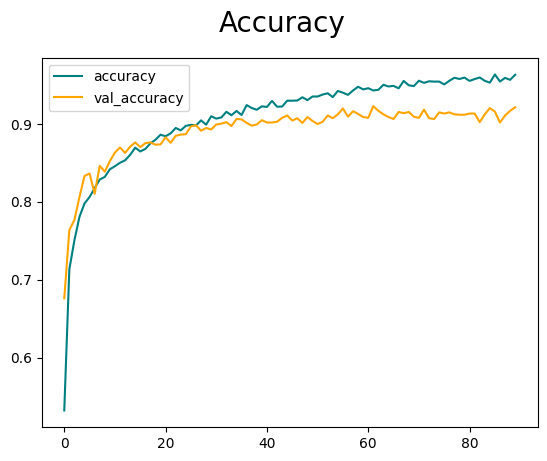

In [ ]:
from matplotlib import pyplot as plt

#Accuracy Graph

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


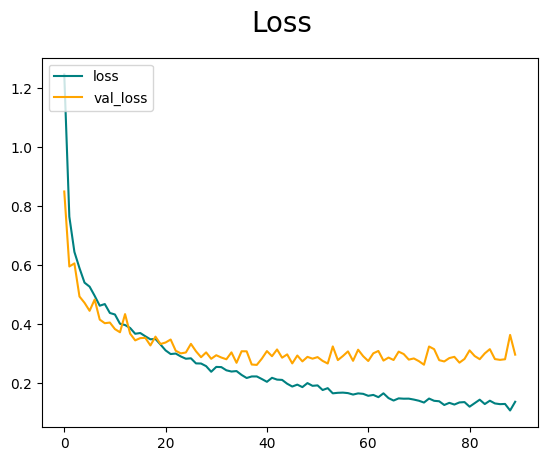

In [ ]:
#Loss Graph
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.save('classification_model.keras') #Saves model

In [ ]:
#Load model

loadModel = tf.keras.models.load_model('classification_model.keras')
loadModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0